In [98]:
import pandas as pd
import opendatasets as od

In [99]:
# od.download("https://www.kaggle.com/competitions/spaceship-titanic")

In [100]:
raw_data=pd.read_csv('spaceship-titanic/train.csv')
raw_data=raw_data[~raw_data['Cabin'].isnull()]


In [101]:
ytrain=raw_data['Transported']

def clean_dt(raw_data):
    return (raw_data
    .drop(columns=['Name','Transported','PassengerId'])
    .assign(
        RoomService=raw_data.RoomService.fillna(0).replace('nan',0),
        CryoSleep=raw_data.CryoSleep.fillna(False),
        VIP=raw_data.VIP.fillna(False).replace('nan',0),
        FoodCourt=raw_data.FoodCourt.fillna(0).replace('nan',0),
        ShoppingMall=raw_data.ShoppingMall.fillna(0).replace('nan',0),
        Spa=raw_data.Spa.fillna(0).replace('nan',0),
        VRDeck=raw_data.VRDeck.fillna(0).replace('nan',0),
        Cabin=raw_data.Cabin.str.split('/',expand=True)[2]=='S' ,
        Age=raw_data.Age.fillna(raw_data.Age.median())
        )
    )
    
Xtrain=clean_dt(raw_data)
# encoding boolean labels
from sklearn import preprocessing

label_encoder=preprocessing.LabelEncoder()
ytrain=label_encoder.fit_transform(ytrain).astype(int)
Xtrain.CryoSleep=label_encoder.fit_transform(Xtrain.CryoSleep).astype(int)
Xtrain.Cabin=label_encoder.fit_transform(Xtrain.Cabin).astype(int)
Xtrain.VIP=label_encoder.fit_transform(Xtrain.VIP)

Xtrain=pd.get_dummies(Xtrain,columns=['Destination','HomePlanet'])

In [102]:
# Port=Xtrain.Cabin.str.split('/',expand=True)[2]=="P"
# new_cab=new_cab[2]
# S_Cabin= Xtrain.loc[].split()== "S"
# Xtrain=Xtrain[~Xtrain['Cabin'].isnull()]

In [103]:
Xtrain.dtypes

CryoSleep                      int32
Cabin                          int32
Age                          float64
VIP                            int64
RoomService                  float64
FoodCourt                    float64
ShoppingMall                 float64
Spa                          float64
VRDeck                       float64
Destination_55 Cancri e        uint8
Destination_PSO J318.5-22      uint8
Destination_TRAPPIST-1e        uint8
HomePlanet_Earth               uint8
HomePlanet_Europa              uint8
HomePlanet_Mars                uint8
dtype: object

In [104]:
(Xtrain
 .assign(Transported=ytrain==True)
 .corr(method='spearman')
 .style
 .background_gradient(cmap='RdBu',vmax=1,vmin=-1)
 .set_sticky(axis='index')
)

,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Transported
CryoSleep,1.000000,0.020889,-0.072007,-0.076476,-0.507133,-0.521453,-0.504342,-0.537715,-0.515993,0.063935,0.090437,-0.103592,-0.109420,0.093487,0.034026,0.459200
Cabin,0.020889,1.000000,0.010176,-0.010163,-0.021415,0.008081,-0.015791,0.000925,-0.010559,0.013130,-0.006331,-0.008055,-0.018050,0.038398,-0.020682,0.103775
Age,-0.072007,0.010176,1.000000,0.102628,0.123040,0.199336,0.099145,0.191256,0.176268,0.020363,-0.035866,-0.001191,-0.223488,0.237756,0.025343,-0.071239
VIP,-0.076476,-0.010163,0.102628,1.000000,0.048794,0.108646,0.034727,0.086425,0.094959,0.043437,-0.001856,-0.033090,-0.162119,0.145318,0.044948,-0.035086
RoomService,-0.507133,-0.021415,0.123040,0.048794,1.000000,0.180158,0.428001,0.239585,0.179149,-0.071769,-0.053042,0.091640,-0.025553,-0.199924,0.248601,-0.362576
FoodCourt,-0.521453,0.008081,0.199336,0.108646,0.180158,1.000000,0.186424,0.468248,0.494490,0.057574,-0.064347,-0.011509,-0.056836,0.266965,-0.213856,-0.184313
ShoppingMall,-0.504342,-0.015791,0.099145,0.034727,0.428001,0.186424,1.000000,0.255240,0.187024,-0.080166,-0.028348,0.084507,0.025301,-0.189419,0.175028,-0.227038
Spa,-0.537715,0.000925,0.191256,0.086425,0.239585,0.468248,0.255240,1.000000,0.435542,0.021424,-0.072394,0.023727,-0.058194,0.169800,-0.107780,-0.365141
VRDeck,-0.515993,-0.010559,0.176268,0.094959,0.179149,0.494490,0.187024,0.435542,1.000000,0.039015,-0.054565,-0.004567,-0.008503,0.202450,-0.203554,-0.347117
Destination_55 Cancri e,0.063935,0.013130,0.020363,0.043437,-0.071769,0.057574,-0.080166,0.021424,0.039015,1.000000,-0.161754,-0.745007,-0.147314,0.289871,-0.118582,0.107480


It seems that the persons who have billed luxury amenities have a negative relationship with being transported. In simple words, the people who have bills are less likely to be transported.

In [105]:
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn import tree

stump_dt=tree.DecisionTreeClassifier(max_depth=1)
stump_dt.fit(Xtrain,ytrain)

DecisionTreeClassifier(max_depth=1)

TypeError: can only concatenate str (not "numpy.int32") to str

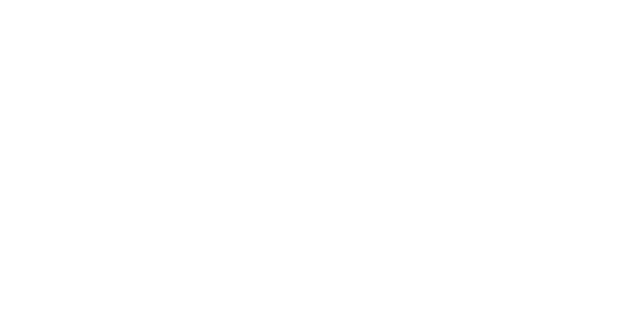

In [106]:
fig,ax=plt.subplots(figsize=(8,4))
features= list(c for c in Xtrain.columns)
tree.plot_tree(stump_dt,
               feature_names=features,
               filled=True,
               class_names=stump_dt.classes_,
               ax=ax)